In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import libpysal as lps
import statsmodels.formula.api as smf
import warnings

warnings.simplefilter('ignore')

In [2]:
india = gpd.read_file('zip://./India_NLEP_HMIS_NFHS.zip')

In [3]:
nlep_Pre = pd.read_excel('NLEP 2017.xlsx')

In [4]:
wq =  lps.weights.Queen.from_dataframe(india)
wq.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 288, ' is an island (no neighbors)')


In [5]:
nlepts1 = pd.read_excel('NLEP Train 2017.xlsx')
nlepts2 = pd.read_excel('NLEP Test 2017.xlsx')
nlepts2.columns

Index(['Unnamed: 0', 'State', 'District', 'Year', 'iRate', 'pRate', 'RBD',
       'iRate_sp', 'pRate_sp', 'Class', 'RiRate', 'RpRate', 'Focus', 'Y*F',
       'RBD*F', 'Class*F', 'RpRate*F', 'iRate_sp*F', 'Intercept'],
      dtype='object')

In [7]:
num = 0
toadd = []
for dis in nlepts1['District'].unique().tolist():
#     if num > 2:
#         break
#     else :
    nlepts1_train = nlepts1[nlepts1['District'] == dis]
    nlepts2_test = nlepts2[nlepts2['District'] == dis]
    y = nlepts1_train['iRate']
    X = nlepts1_train[['Intercept','Year']]
    X_Test = nlepts2_test[['Intercept','Year']]
    md = sm.OLS(endog=y, exog=X, data=nlepts1_train).fit()
    pre = md.predict(exog=X_Test).values[0]
    exp = nlepts2_test['iRate'].values[0]
    #print(pre-exp)
    toadd.append(pre)
    #print(md.summary())
    num +=1

In [8]:
nlep_Pre['P1'] = toadd
nlep_Pre['E1'] = nlep_Pre['P1'] - nlep_Pre['iRate']

In [58]:
nlep_Pre.to_excel('NLEP 20161.xlsx')

In [59]:
nlep_Pre = pd.read_excel('NLEP 20161.xlsx')

In [160]:
india2016 = gpd.GeoDataFrame(nlep_Pre,geometry=india['geometry'])

In [163]:
india2016[((india2016['E1'] < 5) & (india2016['E1'] > -5))].shape

(583, 30)

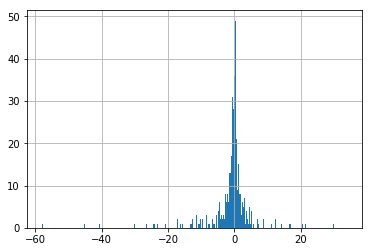

In [10]:
nlep_Pre['E1'].hist(bins=500)
# plt.xlim(-5,5)

In [23]:
(660-98)/660

0.8515151515151516

In [21]:
ext = nlep_Pre[~((nlep_Pre['E1'] < 5) & (nlep_Pre['E1'] > -5))]

In [22]:
ext.shape

(98, 24)